# Constructing Graphs from [AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/)

In this quick tutorial we show how to construct graphs from the [AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/). This is a fantastic resource for the community and we hope to make it more accessible to the Geometric Deep Learning community!

We provide a utility `graphein.protein.utils.download_alphafold_structure()` to download PDBs and associated metadata (aligned error scores as an accompanying `JSON` file). After downloading the structure, simply use Graphein to compute the graph as you normally would. You can check out the `residue_graphs.ipynb` notebook tutorial to go deeper into protein graph construction utilities in Graphein.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.WARNING)

from graphein.protein.graphs import construct_graph
from graphein.protein.config import ProteinGraphConfig

from graphein.protein.utils import download_alphafold_structure

To use the Graphein submodule graphein.protein.visualisation, you need to install pytorch3d.

To do so, use the following command:

    conda install -c pytorch3d pytorch3d


In [2]:
# Download the PDB file for an exmaple protein (UniProt: Q8W3K0) with the aligned score
protein_path = download_alphafold_structure("Q8W3K0", out_dir = "/tmp", aligned_score=True)
protein_path

-1 / unknown

-1 / unknown

-1 / unknown

-1 / unknown

-1 / unknown

-1 / unknown

-1 / unknown

('/tmp/AF-Q8W3K0-F1-model_v1 (1).pdb',
 '/tmp/AF-Q8W3K0-F1-predicted_aligned_error_v1 (1).json')

In [3]:
# Download the PDB file for an exmaple protein (UniProt: Q8W3K0) without the aligned score
protein_path = download_alphafold_structure("Q8W3K0", out_dir="/tmp", aligned_score=False)
protein_path

-1 / unknown

'/tmp/AF-Q8W3K0-F1-model_v1 (1).pdb'

In [4]:
# Load the default config
c = ProteinGraphConfig(granularity='CA')

# Construct the graph!
g = construct_graph(pdb_path=protein_path)

/Users/arianjamasb/github/graphein/graphein/protein/visualisation.py:364: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, auto_add_to_figure=True)


<Axes3D:>

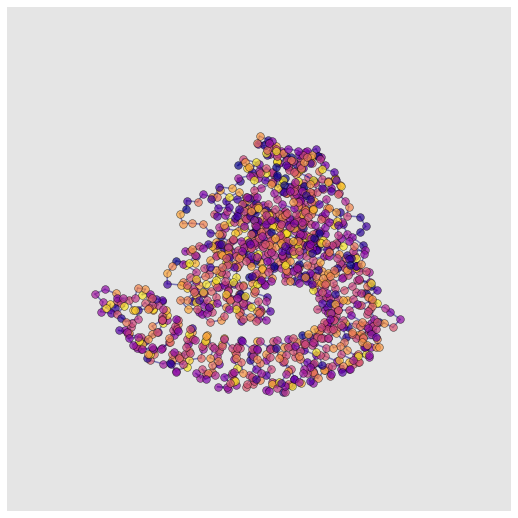

In [5]:
from graphein.protein.visualisation import plot_protein_structure_graph

plot_protein_structure_graph(g, angle=30, colour_edges_by="kind", colour_nodes_by="residue_name", label_node_ids=False)

## Adding Edges
What if we want to add some more edges to the graph? Well..

/Users/arianjamasb/github/graphein/graphein/protein/visualisation.py:364: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, auto_add_to_figure=True)


<Axes3D:>

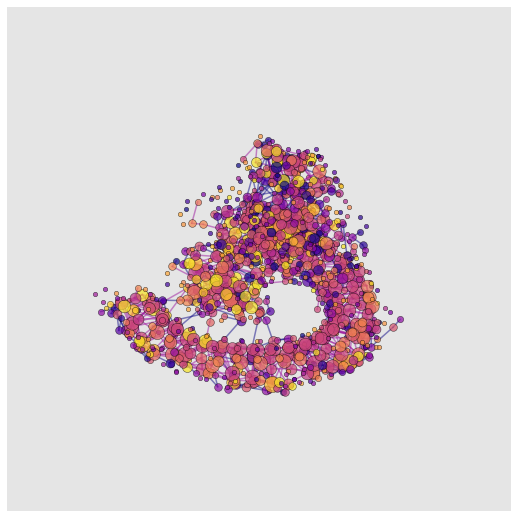

In [6]:
from graphein.protein.edges.distance import add_aromatic_interactions, add_cation_pi_interactions, add_hydrophobic_interactions, add_ionic_interactions

config = ProteinGraphConfig(edge_construction_functions=[add_cation_pi_interactions,
                                                         add_hydrophobic_interactions,
                                                         add_ionic_interactions])

g = construct_graph(pdb_path=protein_path, config=config)
    
plot_protein_structure_graph(g, angle=30, colour_edges_by="kind", colour_nodes_by="residue_name", label_node_ids=False)
                            
                            

You can also check out our residue graph tutorial for more customisation options!!